In [1]:
from scipy.fft import fft, fftfreq, fftshift, ifft
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import helpers
import plots
import iaf_fri
import scipy

In [3]:
dur = 10
dt = 0.005
t = np.arange(0, dur, dt)
t_0_centered = np.arange(-dur/2, dur/2, dt)

w_0 = 1

k = 0

l = (2/dt)*(1+k*np.pi/w_0) 
l = int(l)

In [4]:
len(t)

2000

In [5]:
l

400

In [6]:
def phi_kernel(t_0_centered, w_0, l):
    
    t_left_first_index = int(len(t_0_centered)/2) - l
    t_left_last_index = t_left_first_index + int(l/2)
    
    t_right_first_index = t_left_last_index
    t_right_last_index = t_left_first_index + l
    
    t_left = t_0_centered[t_left_first_index : t_left_last_index]
    t_right = t_0_centered[t_right_first_index : t_right_last_index]
    
    phi_left = (1/w_0) * np.sin(w_0 * (2 + t_left))
    phi_right = - (1/w_0) * np.sin(w_0 * t_right) 
    
    phi = np.zeros(len(t_0_centered))
    
    phi[t_left_first_index : t_left_last_index] = phi_left
    phi[t_right_first_index : t_right_last_index] = phi_right
    
    return phi

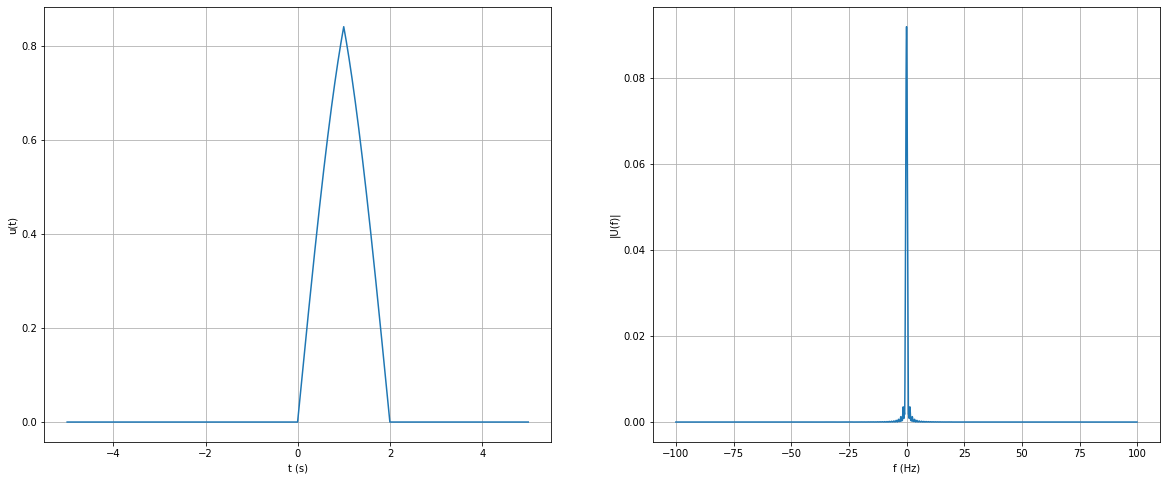

In [7]:
phi = phi_kernel(t_0_centered, w_0, l)

phi = np.flip(phi)

plots.plot_signal_and_fourier(t_0_centered, phi, dt)

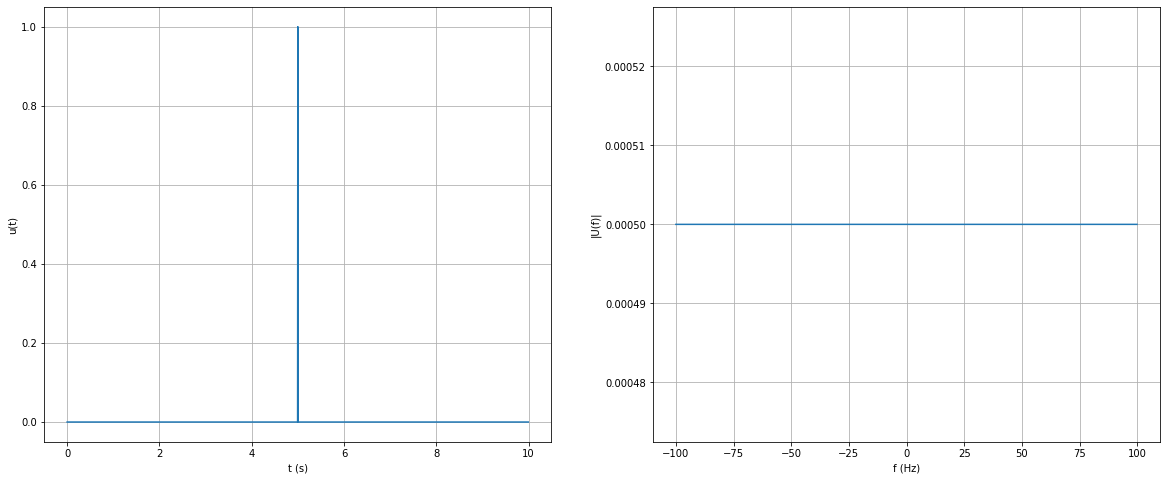

In [8]:
u = scipy.signal.unit_impulse(len(t), idx=1000)

plots.plot_signal_and_fourier(t, u, dt)

In [9]:
convolved = scipy.convolve(u, phi)

convolved.shape

/home/ghassenk/Environments/Python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  """Entry point for launching an IPython kernel.


(3999,)

In [10]:
u.shape

(2000,)

In [11]:
phi.shape

(2000,)

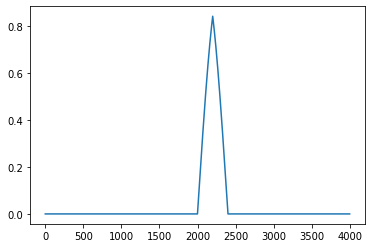

In [12]:
plt.plot(convolved)

In [13]:
convolved = convolved[int(len(t)/2): -int(len(t)/2)+1]
convolved.shape

(2000,)

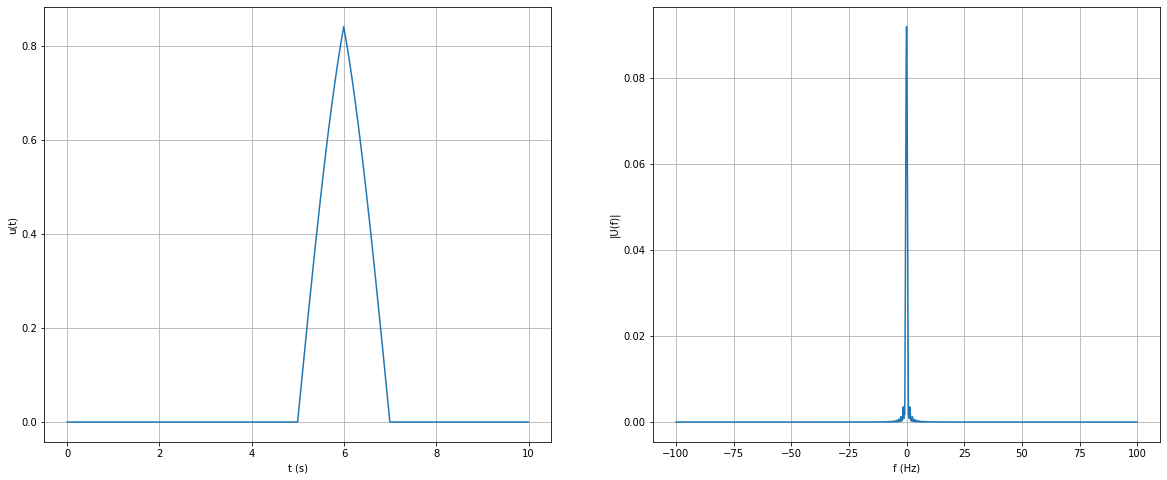

In [14]:
plots.plot_signal_and_fourier(t, convolved, dt)

In [15]:
alpha = 1  # firing parameter
theta = 0.1  # threshold

spike_indices, ys, q_signs = iaf_fri.IAF_encode(convolved, dt, alpha, theta, t)

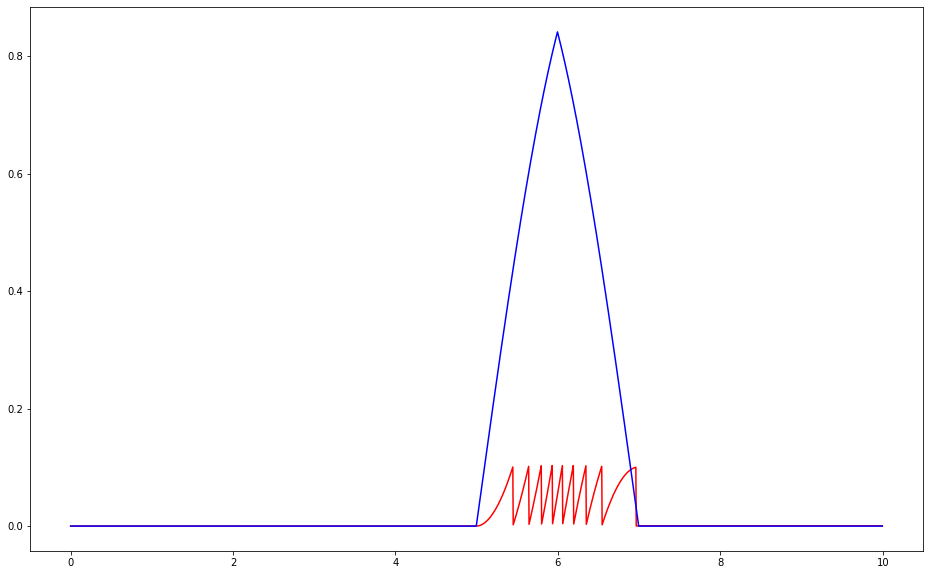

In [16]:
plt.figure(figsize=(16, 10))

plt.plot(t, ys, 'r')
plt.plot(t, convolved, 'b')

plt.show()